# Adaptive Displacement example
This notebook is presented to show the benefits of using adaptive displacement in a Markov chain to explore the constrained space. We use the simple 2-dimensional example for ease of visualization. 

- First, we consider a Markov chain with fixed step size that runs for 2 orders of magnitude more steps than the desired sample
- Next, we use the same number of steps with an adaptive displacement protocol
- Finally, we demonstrate the a use-case that automatically implements the adaptive displacement algorithm to fill out space if a sample is requested that is larger then the space cache. 

In [1]:
import sys
sys.path.append('../')
from constrained_sampler.sample_space import SampledSpace
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

Global parameterization

In [2]:
font = {'size': 18}
mpl.rc('font', **font)
max_steps = 10**5
sample_size = 10**3

In [3]:
def plot_space(arr):
    # Convenience plotting function for 2-d compositional test case. 
    x = np.arange(0.0, 1, 0.01)
    y = 1 - x
    fig, ax = plt.subplots(figsize=(15,10))
    ax.fill_between(x, 0, y, label='Accesible Space')
    ax.scatter(arr[:,0], arr[:,1], label='Sampled Space')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    leg = ax.legend()
    return fig

In [4]:
adaptive_space = SampledSpace('../examples/mixture.txt',random_state=1234)
adaptive_space.adaptive_displacement(total_steps=max_steps)
print("Size of cache", len(adaptive_space._cache))
print("Mean of cache", np.mean(np.array(tuple(adaptive_space._cache)),axis=0))

Size of cache 59211
Mean of cache [0.2328953  0.24748133]


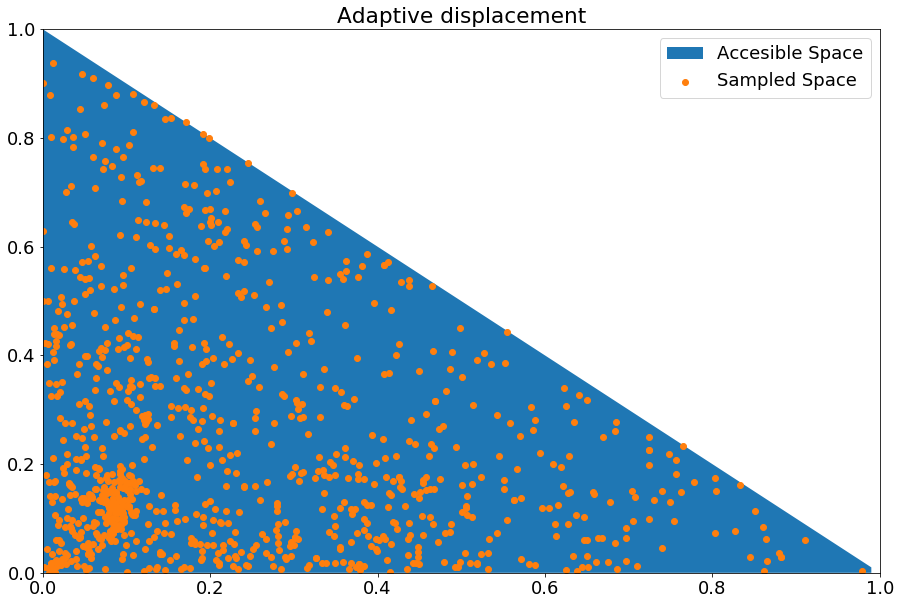

In [5]:
fig = plot_space(adaptive_space.sample_space(sample_size))
_ = fig.get_axes()[0].set_title('Adaptive displacement')

In [6]:
space = SampledSpace('../examples/mixture.txt', random_state=1234)
space.random_walk(max_steps)
print("Size of cache", len(space._cache))
print("Mean of cache", np.mean(np.array(tuple(space._cache)),axis=0))

Size of cache 99525
Mean of cache [0.10648285 0.17837251]


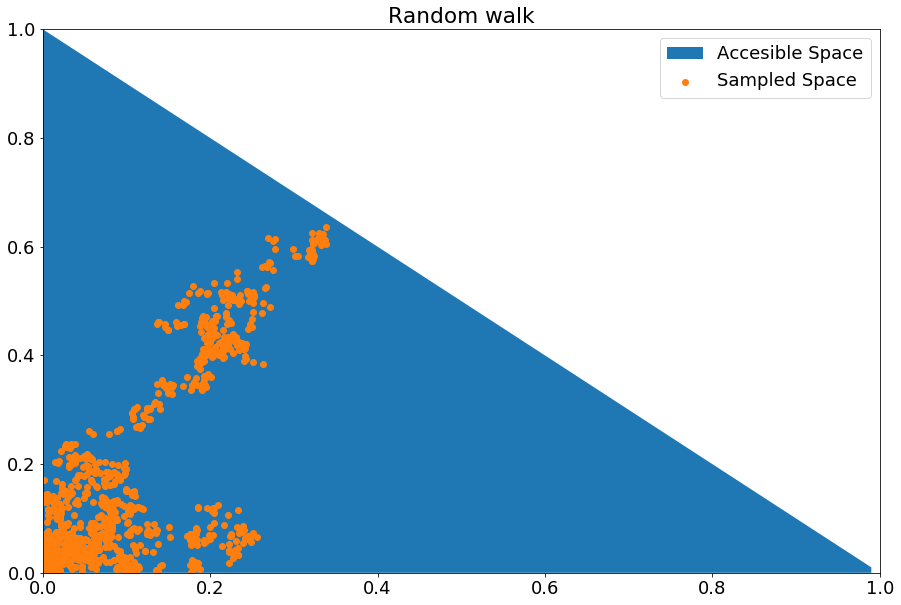

In [7]:
fig = plot_space(space.sample_space(sample_size))
_ = fig.get_axes()[0].set_title('Random walk')

### This use-case will issue a warning
The number of points in space should be far greater than the desired sample. Note how even scarce adaptive displacement outperforms a random walk with fixed step size. 

In [8]:
poor_space = SampledSpace('../examples/mixture.txt', random_state=1234)
arr = poor_space.sample_space(sample_size)
print("Size of cache", len(poor_space._cache))
print("Mean of cache", np.mean(np.array(tuple(poor_space._cache)),axis=0))

Size of cache 1426
Mean of cache [0.19794921 0.20309038]


../constrained_sampler/sample_space.py:179: UserWarning: Desired sample size 1000 is larger than current cache size 1. Running simulated annealing until sufficiently large.
  "until sufficiently large.".format(sample_size, len(self._cache)), UserWarning)


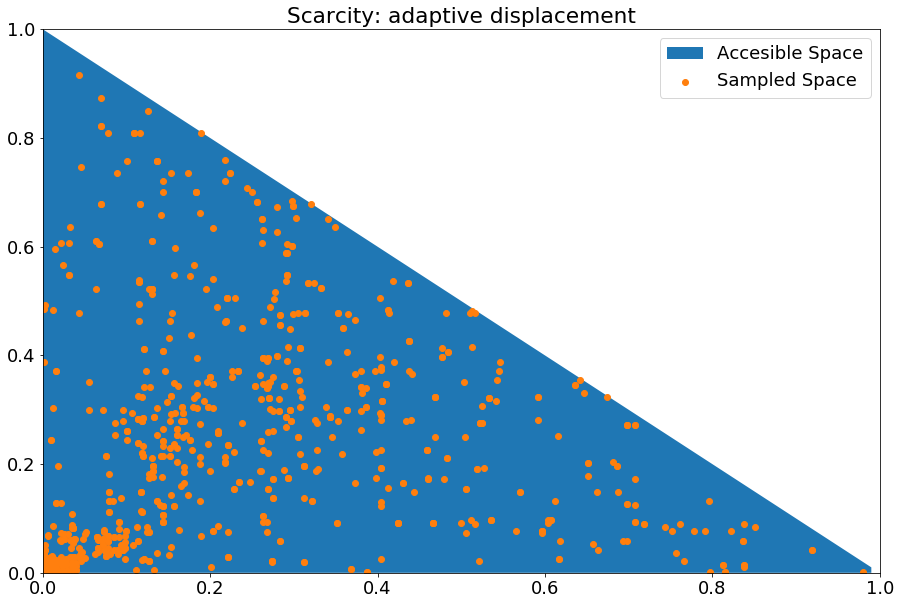

In [9]:
fig = plot_space(arr)
_ = fig.get_axes()[0].set_title('Scarcity: adaptive displacement')